# Notes - maternal age


In [1]:
import duckdb
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph
from sympy.physics.units import magnetic_density

from variables import Variables as vars

plt.style.use('../../notebook.mplstyle')

os.makedirs("./output", exist_ok=True)

In [2]:
con = duckdb.connect("./data/us_births.db", read_only=True)

In [3]:
mage_df = con.execute(
    """
    SELECT mage_c,
           COUNT(*)      as lb,
           SUM(down_ind) as count_down_ind,
           AVG(down_ind) as prob_down_ind,
           SUM(p_ds_lb_wt_mage_reduc) as count_ds_lb_wt_mage_reduc,
           AVG(p_ds_lb_wt_mage_reduc) as prob_ds_lb_wt_mage_reduc,
           SUM(ds_case_weight) as count_ds_case_weight,
           AVG(ds_case_weight) as prob_ds_case_weight,
    FROM us_births
    WHERE
        year >= 1989
    GROUP BY mage_c
    ORDER BY mage_c
    """
).df()
mage_df.set_index("mage_c")
mage_df

,mage_c,lb,count_down_ind,prob_down_ind,count_ds_lb_wt_mage_reduc,prob_ds_lb_wt_mage_reduc,count_ds_case_weight,prob_ds_case_weight
0,10,135,0.0,0.000000,0.066471,0.000492,0.0000,0.000000
1,11,430,0.0,0.000000,0.205734,0.000478,0.0000,0.000000
2,12,5612,2.0,0.000420,2.580493,0.000460,5.3307,0.000950
3,13,36816,7.0,0.000222,17.007112,0.000462,21.5234,0.000585
4,14,186378,39.0,0.000253,86.000604,0.000461,123.7599,0.000664
5,15,597678,163.0,0.000330,275.688307,0.000461,446.5062,0.000747
6,16,1333835,364.0,0.000331,615.226338,0.000461,1015.9902,0.000762
7,17,2338979,611.0,0.000318,1079.562129,0.000462,1659.7742,0.000710
8,18,3653735,948.0,0.000317,1687.403650,0.000462,2491.6319,0.000682
9,19,5132827,1389.0,0.000330,2373.471894,0.000462,3665.2405,0.000714


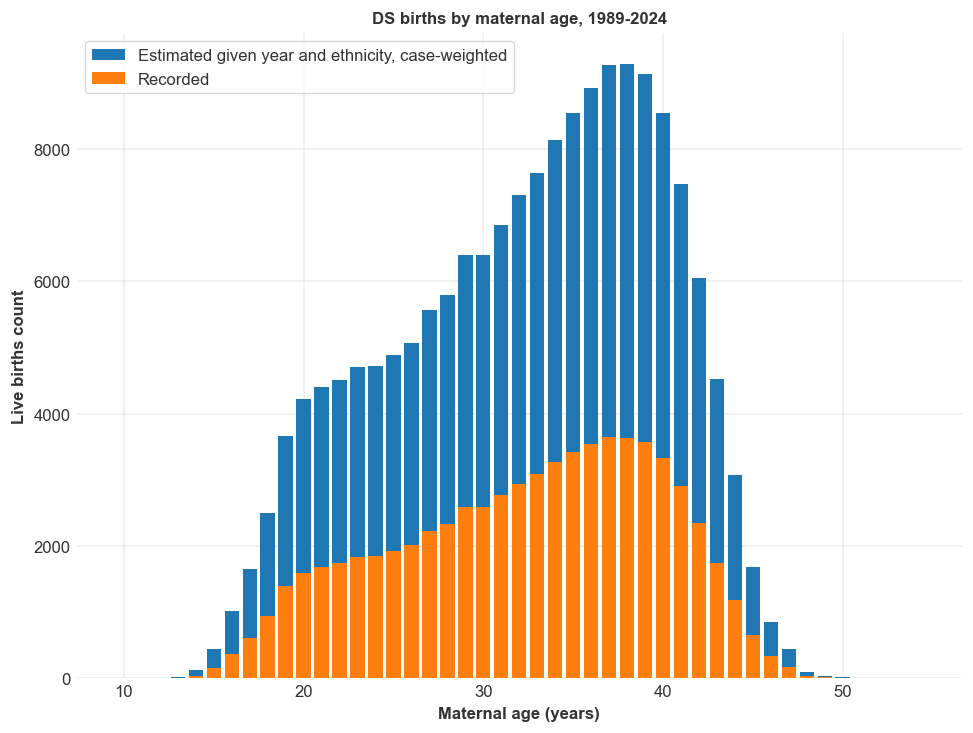

In [11]:
plt.bar(mage_df["mage_c"], mage_df["count_ds_case_weight"], label="Estimated given year and ethnicity, case-weighted")
plt.bar(mage_df["mage_c"], mage_df["count_down_ind"], label="Recorded")
plt.title('DS births by maternal age, 1989-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('Live births count')
plt.legend()

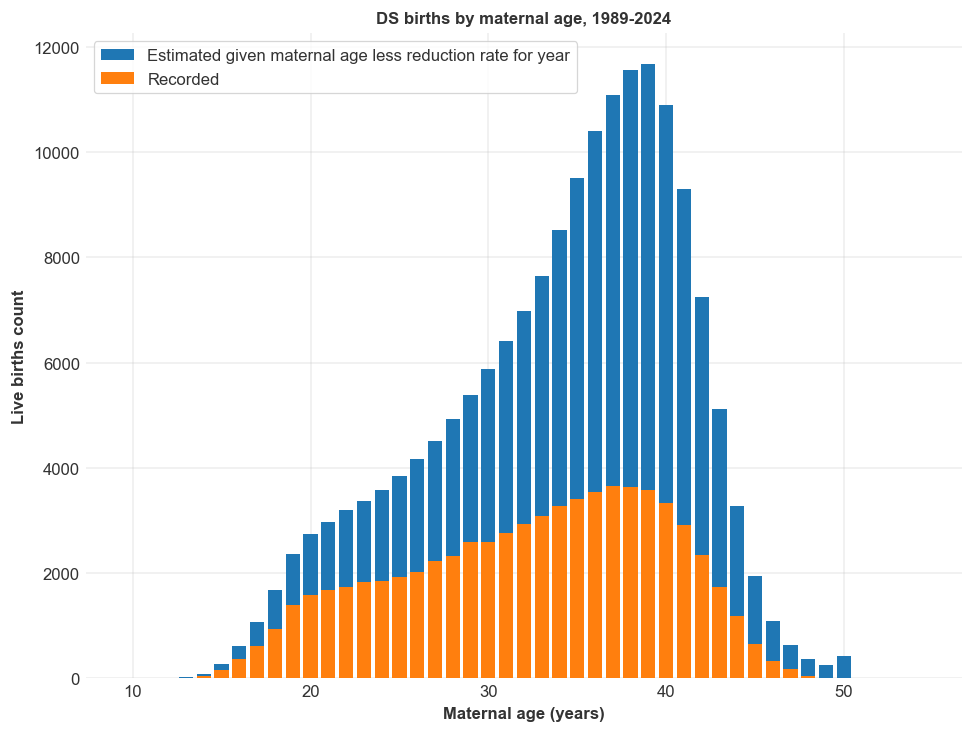

In [13]:
plt.bar(mage_df["mage_c"], mage_df["count_ds_lb_wt_mage_reduc"], label="Estimated given maternal age less reduction rate for year")
plt.bar(mage_df["mage_c"], mage_df["count_down_ind"], label="Recorded")
plt.title('DS births by maternal age, 1989-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('Live births count')
plt.legend()

In [ ]:
con.close()